In [1]:
#popt_flat = {'a': 0.5878,  'ssv': -1.1539, 'tr': 0.120, 'v': 0.95904, 'xb': 1.845}
y_flat = array([ 0.93463,  0.99385,  0.98402,  0.91107,  0.54959,  0.14221,
         0.51458,  0.5458 ,  0.56643,  0.58621,  0.614  ,  0.49743,
         0.52929,  0.55066,  0.56961,  0.59699])
yhat_flat = array([ 0.96565,  1.     ,  0.99799,  0.92021,  0.55117,  0.16872,
        0.51673,  0.5451 ,  0.56654,  0.58796,  0.61784,  0.50442,
        0.5306 ,  0.54872,  0.56774,  0.59491])
finfo_flat_dict = {'logp': -134.9745683471391, 'df': 11, 'ssv': -1.1539911430640575, 'xb': 1.845200842716557, 'nfev': 117, 'nvary': 5, 'AIC': -124.9745683471391, 'a': 0.5878677077625838, 'chi': 0.0023862904091628626, 'tr': 0.12069921450345845, 'BIC': -130.59254171246522, 'rchi': 0.00021693549174207842, 'cnvrg': True, 'v': 0.9590383185377456, 'ndata': 16}
# finfo_flat = pd.Series(finfo_flat_dict)

#v_bsl = 0.98670
#v_pnl = 0.94318
#popt['v'] = np.array([v_bsl, v_pnl])
y = array([ 0.94201,  0.99426,  0.98279,  0.89672,  0.50492,  0.10328,
        0.51263,  0.54257,  0.56297,  0.58212,  0.61031,  0.49795,
        0.52919,  0.54817,  0.56757,  0.59428,  0.92725,  0.99344,
        0.98525,  0.92541,  0.59426,  0.18115,  0.51652,  0.54902,
        0.56989,  0.59031,  0.6177 ,  0.49691,  0.52939,  0.55316,
        0.57166,  0.59969])
yhat = array([ 0.97924,  1.     ,  0.99715,  0.89649,  0.49095,  0.12952,
        0.51026,  0.53772,  0.55901,  0.58015,  0.61188,  0.4994 ,
        0.52516,  0.54306,  0.56173,  0.58938,  0.95521,  0.99999,
        0.99841,  0.93175,  0.59041,  0.19477,  0.51974,  0.54848,
        0.57081,  0.59186,  0.62216,  0.50768,  0.53345,  0.55241,
        0.5712 ,  0.59826])

finfo_dict = {'a': 0.5878677368164062, 'nvary': 2, 'logp': -279.2829727203045, 'df': 30, 'chi': 0.004861561891504873, 'ssv': -1.1539911031723022, 'tr': 0.1206992119550705, 'BIC': -275.1240896369448, 'xb': 1.8452008962631226, 'v_bsl': 0.9867001692803977, 'nfev': 55, 'cnvrg': True, 'v_pnl': 0.9431834622518617, 'ndata': 32, 'rchi': 0.00016205206305016243, 'AIC': -275.2829727203045}
# finfo = pd.Series(finfo_dict)


def breakdown_vector(vector):
    nssd = 5+1
    nquant = 5 # len(fp['percentiles'])
    
    presp = vector[1:nssd]
    quant = vector[-nquant*2:]
    quant_cor = quant[:nquant]
    quant_err = quant[-nquant:]
    #quant_err = vector[nssd+nquant:]
    
    return presp, quant_cor, quant_err

In [2]:
#fp = dict(deepcopy(m.fitparams))
from radd.tools.analyze import kde_fit_quantiles

y = y.reshape(2, 16)
yhat = yhat.reshape(2, 16)

phat, qchat, qehat, qchat_samples, qehat_samples = [], [], [], [], []
for yh in yhat:
    presp, quant_cor, quant_err = breakdown_vector(yh)
    phat.append(presp)
    qchat.append(quant_cor)
    qehat.append(quant_err)
    qchat_samples.append(kde_fit_quantiles([quant_cor], bw=.01))
    qehat_samples.append(kde_fit_quantiles([quant_err], bw=.01))
    

p, qc, qe, qc_samples, qe_samples = [], [], [], [], []
for yy in y:
    presp, quant_cor, quant_err = breakdown_vector(yy)
    p.append(presp)
    qc.append(quant_cor)
    qe.append(quant_err)
    qc_samples.append(kde_fit_quantiles([quant_cor], bw=.01))
    qe_samples.append(kde_fit_quantiles([quant_err], bw=.01))


p.extend(phat)

In [61]:
p

[array([ 0.99426,  0.98279,  0.89672,  0.50492,  0.10328]),
 array([ 0.99344,  0.98525,  0.92541,  0.59426,  0.18115]),
 array([ 1.     ,  0.99715,  0.89649,  0.49095,  0.12952]),
 array([ 0.99999,  0.99841,  0.93175,  0.59041,  0.19477])]

(0.4, 0.8)

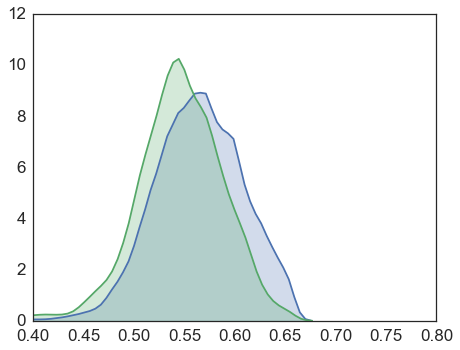

In [10]:
sns.kdeplot(redata.query('ttype=="go"&acc==1').rt.values, shade=True)
sns.kdeplot(redata.query('ttype=="stop"&acc==0').rt.values, shade=True)
plt.gca().set_xlim(.4, .8)

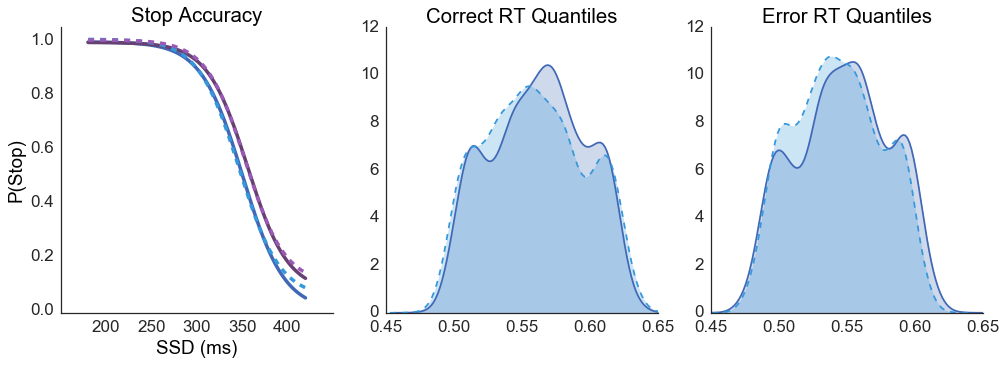

In [5]:
from radd.tools import vis
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
clrs_emp=["#4168B7", "#674172"]
clrs_hat = ["#3498db", "#9B59B6"]
clrs = np.hstack((clrs_emp, clrs_hat)).tolist()

vis.scurves(p,  colors=clrs, markers=False, linestyles=['-', '-', '--', '--'], ax=ax1)
for i in range(1):
    sns.kdeplot(qc_samples[i], cumulative=True, color=clrs_emp[i], ax=ax2)
    sns.kdeplot(qchat_samples[i], cumulative=True, color=clrs_hat[i], ax=ax2, linestyle='--')

    sns.kdeplot(qe_samples[i], cumulative=True, color=clrs_emp[i], ax=ax3)
    sns.kdeplot(qehat_samples[i], cumulative=True, color=clrs_hat[i], ax=ax3, linestyle='--')

ax1.set_title('Stop Accuracy')
ax2.set_title('Correct RT Quantiles')
ax3.set_title('Error RT Quantiles')
for ax in [ax2, ax3]:
    ax.set_xlim(.45, .65)